In [1]:
%pip install insightface
%pip install onnxruntime

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import matplotlib.pyplot as plt

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [3]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640,640))

/opt/anaconda3/lib/python3.7/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:56: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  "Available providers: '{}'".format(name, ", ".join(available_provider_names))


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/apramey/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/apramey/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/apramey/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/apramey/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/apramey/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

In [4]:
swapper = insightface.model_zoo.get_model('../models/inswapper_128.onnx', download=False, download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [5]:
# main_img: File Path to AI generated background image (with one person)
# face_image: File path to mugshot/celebrity face
def swapswap(main_img, face_image, show_steps=False):
    img2 = cv2.imread(main_img)
    
    if show_steps:
        plt.imshow(img2[:,:,::-1])
        plt.title('Background AI image')
        plt.show()

    img_face = cv2.imread(face_image)
    if show_steps:
        plt.imshow(img_face[:,:,::-1])
        plt.title('Mugshot image')
        plt.show()

    face_out = app.get(img2)[0]

    face_in = app.get(img_face)[0]

    # bbox = face_out['bbox']
    # bbox = [int(b) for b in bbox]
    
    # if show_steps:
    #     plt.imshow(img2[bbox[1]:bbox[3],bbox[0]:bbox[2], ::-1])
    #     plt.axis('off')
    #     plt.show()

    # bbox = face_in['bbox']
    # bbox = [int(b) for b in bbox]
    # if show_steps:
    #     plt.imshow(img_face[bbox[1]:bbox[3],bbox[0]:bbox[2], ::-1])
    #     plt.axis('off')
    #     plt.show()

    res2 = img2.copy()

    res2 = swapper.get(res2, face_out, face_in, paste_back=True)

    return res2

    return res2

/opt/anaconda3/lib/python3.7/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


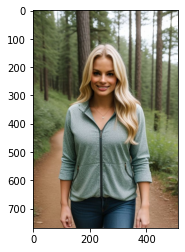

In [6]:
res2 = swapswap('../images/test1.jpeg', '../images/test1-real.png')

plt.imshow(res2[:,:,::-1])
plt.show()

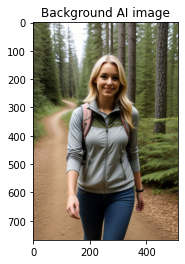

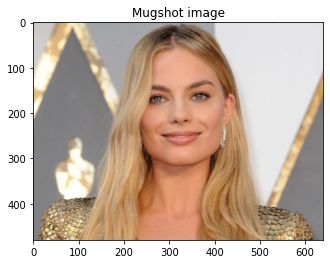

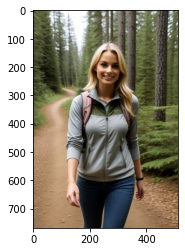

In [7]:
res2 = swapswap('../images/test2.jpeg', '../images/test1-real.png', True)

plt.imshow(res2[:,:,::-1])
plt.show()

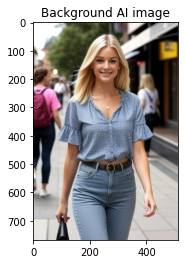

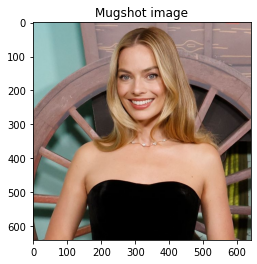

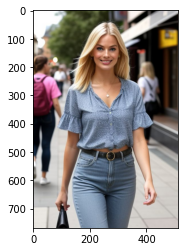

In [8]:
res2 = swapswap('../images/test2-real.jpeg', '../images/test3.png', True)

plt.imshow(res2[:,:,::-1])
plt.show()

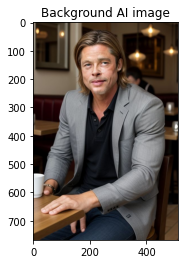

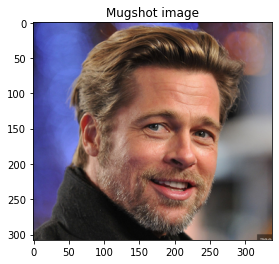

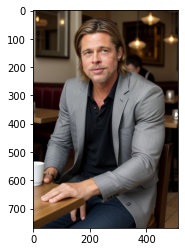

In [9]:
res2 = swapswap('../images/bp-out.jpeg', '../images/pitt.png', True)

plt.imshow(res2[:,:,::-1])
plt.show()